### Sample program for reading SVR model and related files    

#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from joblib import load

#### Read SVR model and related files from files    

In [2]:
tag = 'vibration'
C = 100.0
gamma = 'scale'
epsilon = 0.2

sc_file = 'sc_{}.joblib'.format(tag)
model_file = 'svr_{}_rbf_c{}_g{}_e{}.joblib'.format(tag,C,gamma,epsilon)
sc = load(sc_file)
svr = load(model_file)

#### Parameters  

In [3]:
csv_in = 'vibration.csv'
csv_in2 = 'vibration2.csv'

#### Read CSV file  

In [4]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(200, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB
None


,x,y
0,-1.500,-0.795
1,-1.474,-0.879
2,-1.472,-0.885
3,-1.470,-0.889
4,-1.460,-0.914


#### Obtain X and y  

In [5]:
X = df[['x']]
print(X.shape)
y = df['y']
print(y.shape)

(200, 1)
(200,)


#### Split X and y for train and test  

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

#### Scaling using object from file, and do prediction  

In [7]:
X_train_std = sc.transform(X_train)
y_train_pred = svr.predict(X_train_std)
X_test_std = sc.transform(X_test)
y_test_pred = svr.predict(X_test_std)

#### Scatter plot of the prediction of SVR and true value for train / test data  
- The model has been reproduced perfectly.

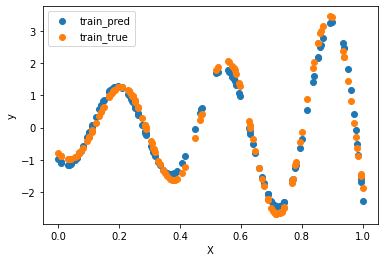

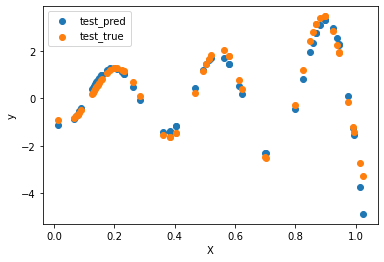

In [8]:
plt.scatter(X_train_std, y_train_pred, label='train_pred')
plt.scatter(X_train_std, y_train, label='train_true')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

plt.scatter(X_test_std, y_test_pred, label='test_pred')
plt.scatter(X_test_std, y_test, label='test_true')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

#### Read CSV file  

In [9]:
df2 = pd.read_csv(csv_in2, delimiter=',', skiprows=0, header=0)
print(df2.shape)
print(df2.info())
display(df2.head())

(50, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       50 non-null     float64
 1   y       50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes
None


,x,y
0,-1.383,-0.988
1,-1.346,-0.942
2,-1.334,-0.915
3,-1.320,-0.875
4,-1.296,-0.794


In [10]:
X2 = df2[['x']]
print(X2.shape)
y2 = df2['y']
print(y2.shape)

(50, 1)
(50,)


In [11]:
X2_std = sc.transform(X2)
y2_pred = svr.predict(X2_std)

#### Scatter plot of X and y  

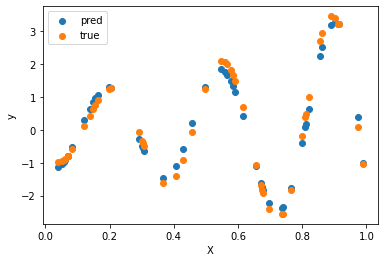

In [12]:
plt.scatter(X2_std, y2_pred, label='pred')
plt.scatter(X2_std, y2, label='true')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

#### Check prediction for wide range of X  

In [13]:
X_lin = np.linspace(-2, 2, num=200)
y_lin_pred = svr.predict(X_lin.reshape(-1,1))

#### Scatter plot of predicted data  

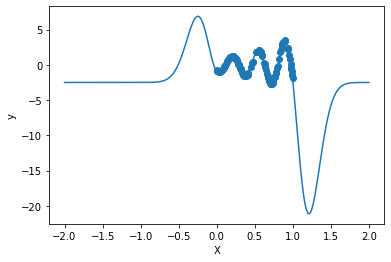

In [14]:
plt.scatter(X_train_std, y_train)
plt.plot(X_lin, y_lin_pred)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

##### NOTE: SVR does not get periodicity of input data  

#### (Adv) Fitting a function by using curve_fit()  

In [15]:
from scipy.optimize import curve_fit

#### Function to be fitted  

In [16]:
def f(x, a, b, c, d):
    tot = a * np.exp(b*x) * np.sin(2*c*np.pi*x+d)
    return tot

#### Reshape X_std (2-d) into X_std_1d (1-d)  

In [17]:
X_train_std_1d = X_train_std.flatten()

#### Do fitting  

In [18]:
popt, pcov = curve_fit(f, X_train_std_1d, y_train)
print(popt)

[ 0.94498966  1.45849463  2.91782485 -8.42432411]


#### Obtain regression line  

In [19]:
y_reg = f(X_train_std_1d, *popt)

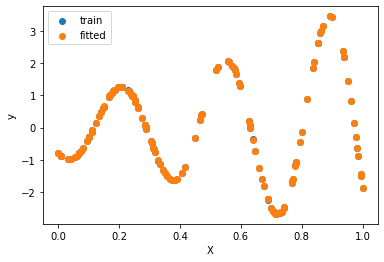

In [20]:
plt.scatter(X_train_std_1d, y_train, label='train')
plt.scatter(X_train_std_1d, y_reg, label='fitted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

#### Check prediction for wide range of X  

In [21]:
y_lin = f(X_lin, *popt)

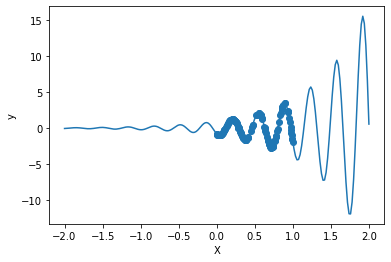

In [22]:
plt.scatter(X_train_std_1d, y_train)
plt.plot(X_lin, y_lin)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

##### NOTE: Fitted function includes periodicity (sin())     